<h1 style="color:red">Part B: Customer Churn Prediction</h1>

<h3>1. Overview</h3>
<p>Customer churn, or customer attrition, refers to when a customer ceases their relationship
with a company or service provider. In today's highly competitive business environment,
retaining customers is a critical factor for long-term success. Predicting customer churn can
help organizations take proactive steps to retain customers, thus minimizing revenue loss.
This project aims to build a machine learning model that can predict whether a customer will
churn based on their demographic, account, and service-related data.</p>

<h3>2. Problem Statement</h3>
<p>The goal of this project is to develop a classification model that predicts whether a customer
will churn. Using demographic data (such as gender, senior citizen status, and tenure), along
with information about the services they use (such as internet service, phone service, and
online security), we will attempt to build a model that helps the company identify customers
who are at a high risk of churning.
By predicting customer churn, the company can proactively design retention strategies to
keep these customers, thereby improving customer satisfaction and reducing financial loss.
</p>

<h3>3. Dataset Information</h3>
<p></p>
<a href="https://docs.google.com/document/d/1V-L3EdEnEEiYHhxppRY_CkPRbJ77ELYc/edit?usp=sharing&ouid=103283051675327639429&rtpof=true&sd=true">The dataset information can be found in this doc</a>

In [109]:
import numpy as np
import pandas as pd

In [110]:
df = pd.read_csv("Customer_data.csv")

In [111]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
df.shape

(7043, 21)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]  

missing_summary

,Missing Values,Percentage
TotalCharges,11,0.156183


In [115]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [116]:
df.drop(columns=['customerID'], inplace=True)

In [117]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [118]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [119]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [120]:
df = pd.get_dummies(df, drop_first=True)

In [121]:
df.shape

(7043, 31)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [123]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Print outliers
for col, outlier_values in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_values, "\n")

Outliers in gender:
Series([], Name: gender, dtype: int64) 

Outliers in SeniorCitizen:
20      1
30      1
31      1
34      1
50      1
       ..
7023    1
7029    1
7031    1
7032    1
7041    1
Name: SeniorCitizen, Length: 1142, dtype: int64 

Outliers in tenure:
Series([], Name: tenure, dtype: int64) 

Outliers in MonthlyCharges:
Series([], Name: MonthlyCharges, dtype: float64) 

Outliers in TotalCharges:
Series([], Name: TotalCharges, dtype: float64) 

Outliers in Churn:
Series([], Name: Churn, dtype: int64) 



In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

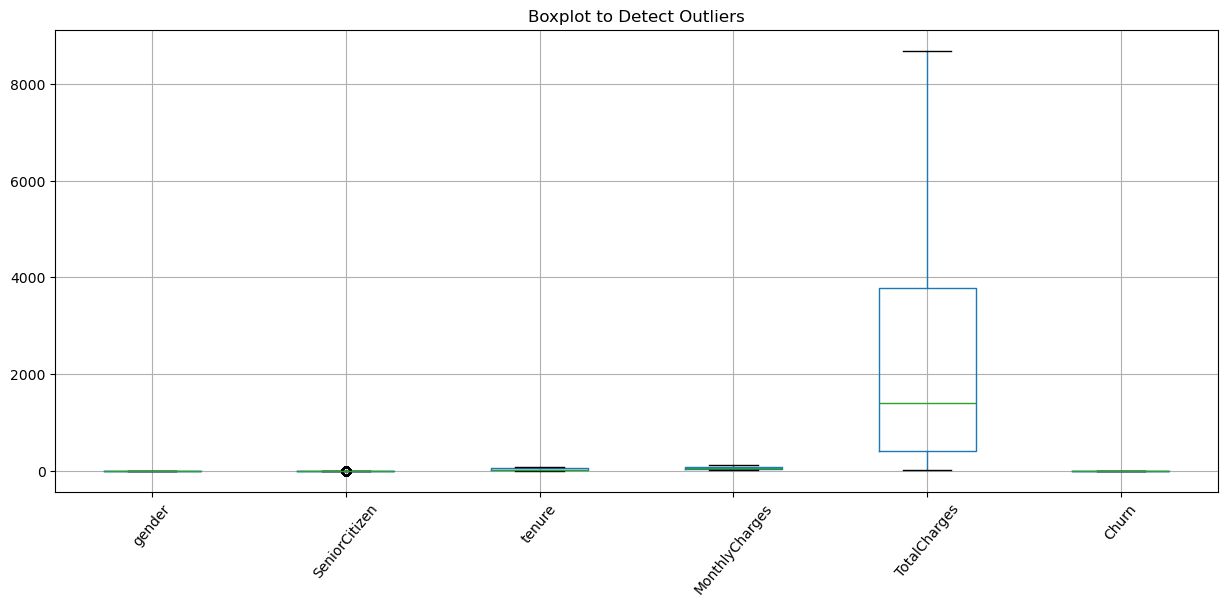

In [125]:
plt.figure(figsize=(15, 6))
df[numerical_cols].boxplot(rot=50)
plt.title("Boxplot to Detect Outliers")
plt.show()

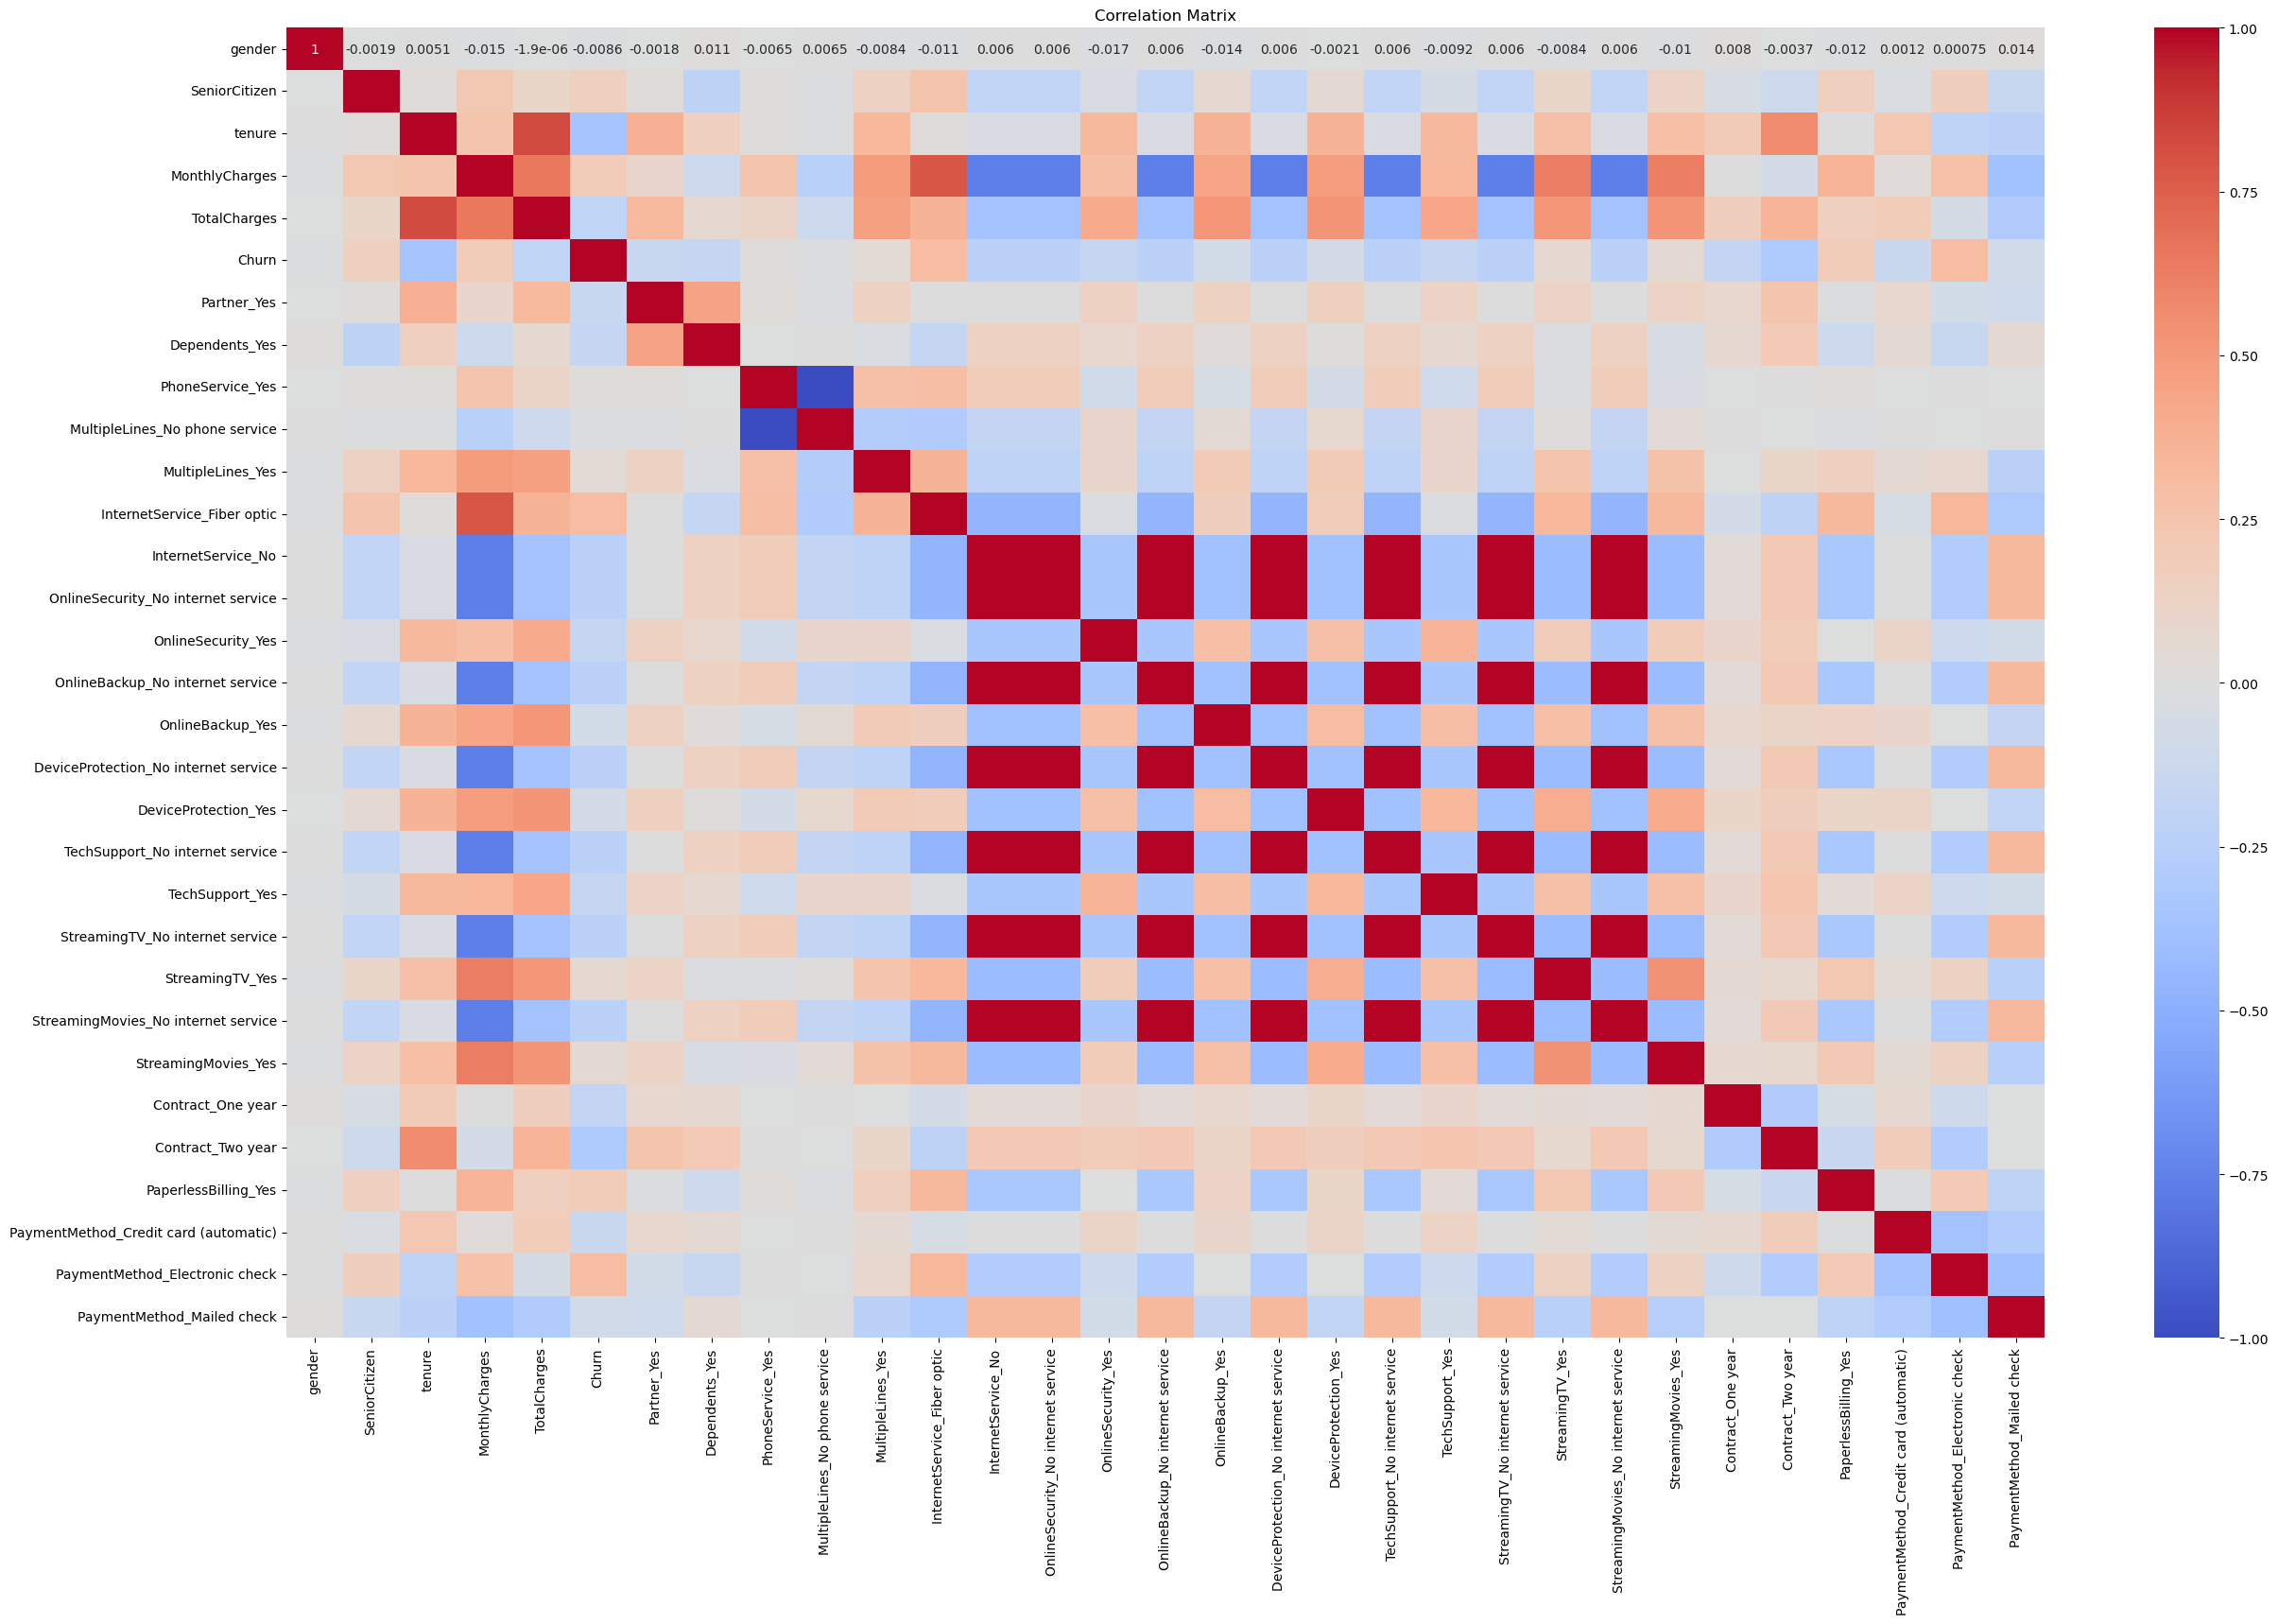

In [126]:
num_cols = list()

for column in df.columns:
    if df[column].dtype != object:
       num_cols.append(column)
        
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(30, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<h2>Machine Learning Model- <h2 style="color:red">Random Forest</h2></h2>

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [128]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [130]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [132]:
y_pred = model.predict(X_test)

<h4>Model Evalution</h4>

<h4>Accuracy</h4>

In [133]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7856635911994322

<h4>Precision</h4>

In [135]:
precision = precision_score(y_test, y_pred)
precision

0.62

<h4>Recall</h4>

In [136]:
recall = recall_score(y_test, y_pred)
recall

0.49732620320855614

<h4>F1 Score</h4>

In [137]:
f1 = f1_score(y_test, y_pred)
f1

0.5519287833827894

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [148]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)


Accuracy: 0.6231369765791341
Confusion Matrix:
[[807 229]
 [302  71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1036
           1       0.24      0.19      0.21       373

    accuracy                           0.62      1409
   macro avg       0.48      0.48      0.48      1409
weighted avg       0.60      0.62      0.61      1409



<h2>Tune the hyperparameters of your models to improve performance</h2>

<h2>Hyperparameter tuning: </h2>
<p>A machine learning model's learning process is managed by its hyperparameters. In contrast to model parameters, such as weights in linear regression, hyperparameters must be manually defined and are not learnt from data.
</p>
<p>We can use RandomizedSearchCV to determine the optimal hyperparameters, which, unlike Grid Search, randomly chooses a subset of possible hyperparameter combinations.</p>

<h3>Use Of RandomizedSerchCV</h3>
<p> n_estimators: The Random Forest's number of decision trees.</p>
 <p>max_depth: A tree's maximum depth; overfitting may result from greater values.</p>
 <p>min_samples_split: The smallest quantity of samples needed to divide a node.</p>
<p>A dictionary of hyperparameters and their potential values is thus produced.</p>

In [158]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}


In [159]:
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [160]:
y_pred = model.predict(X_test)

In [161]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7906316536550745

In [162]:
precision = precision_score(y_test, y_pred)
precision

0.6433823529411765

In [163]:
recall = recall_score(y_test, y_pred)
recall

0.4691689008042895

In [164]:
f1 = f1_score(y_test, y_pred)
f1

0.5426356589147286

In [169]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [5, 10, 20, None],       
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],        
    'bootstrap': [True, False]            
}

In [170]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,
    scoring='accuracy',  
    n_jobs=-1, 
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [171]:
best_rf = RandomForestClassifier(
    n_estimators=random_search.best_params_['n_estimators'],
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    min_samples_leaf=random_search.best_params_['min_samples_leaf'],
    bootstrap=random_search.best_params_['bootstrap'],
    random_state=42
)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

In [172]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8112
Precision: 0.6945
Recall: 0.5121
F1 Score: 0.5895


<h2>Video Discription</h2>

<h4>For Description </h4>
<a href="">Click On Me</a>